# Генерація Даних

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
first_names = (
    "Андрій", "Софія", "Максим", "Іванна", "Олександр", "Анна", 
    "Володимир", "Марія", "Петро", "Ольга", "Роман", "Артем", 
    "Євген", "Юлія", "Дмитро", "Тетяна", "Віталій", "Катерина",
    "Ірина", "Олег", "Наталія", "Владислав", "Олена", "Сергій",
    "Ігор", "Анастасія", "Михайло", "Оксана", "Аліна", "Владислава",
    "Єлизавета", "Георгій", "Людмила", "Руслан", "Марина", "Віктор",
    "Ніна", "Денис", "Маргарита", "Валентин", "Дарина", "Анатолій"
)

    
last_names = (
    "Іванов", "Петров", "Сидоров", "Ковальчук", "Бондаренко", "Коваль", 
    "Мороз", "Козак", "Григоренко", "Мельник", "Кузьменко", 
    "Кравченко", "Павленко", "Лисенко", "Захарченко", "Колесник", 
    "Остапчук", "Даниленко", "Козлов", "Ткаченко",
    "Шевченко", "Симоненко", "Савченко", "Карпенко", "Литвиненко",
    "Попов", "Марченко", "Світличний", "Мазур", "Лазаренко",
    "Приходько", "Лук'яненко", "Третяк", "Попович", "Іщенко",
    "Кравцов", "Мироненко", "Бондар", "Гриценко", "Левченко"
)

In [3]:
def get_name_surname():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

In [4]:
get_name_surname()

'Тетяна Третяк'

In [5]:
def is_unique_name(name_surname, dataset):
    return name_surname not in (abiturient[0] for abiturient in dataset)

In [6]:
def generate_dataset(number = 15000):
    dataset = []
    for i in range(number):
        name_surname = get_name_surname()
        # while not is_unique_name(name_surname, dataset):
        #   name_surname = get_name_surname()
            
        privilege = random.choices([True, False], weights=[0.2, 0.8], k=1)[0]
        
        math = random.randint(100, 200)
        english = random.randint(100, 200)
        ukrainian = random.randint(100, 200)
        rate_score = 0.4 * math + 0.3 * english + 0.3 * ukrainian
        decision = 'Незараховано'
        dataset.append([name_surname, privilege, math, english, ukrainian, rate_score, decision])
    
    return dataset 

columns = ["Ім'я Прізвище", 'Пільга', 'Бал з математики', 'Бал з англійської', 'Бал з української', 'Рейтинг', 'Рішення']
    
def prepare_dataframe(total_capacity, size):
    df = pd.DataFrame(generate_dataset(size), columns=columns)
    df.sort_values(by='Рейтинг', ascending=False, inplace=True)
    
    privileged_capacity = int(total_capacity * 0.1)

    possible_unprivileged_num = df[(df['Рейтинг'] >= 160) & (df['Бал з математики'] >= 140) & (~df['Пільга'])].shape[0]
    possible_privileged_num = df[(df['Рейтинг'] >= 144) & (df['Бал з математики'] >= 120) & (df['Бал з англійської'] >= 120) & (df['Бал з української'] >= 120) & (df['Пільга'])].shape[0]

    actual_unprivileged_num = min(possible_unprivileged_num, total_capacity - privileged_capacity)
    actual_privileged_num = min(possible_privileged_num, privileged_capacity)

    criteria_unprivileged = (df['Рейтинг'] >= 160) & (df['Бал з математики'] >= 140) & (~df['Пільга'])
    selected_rows_unprivileged = df[criteria_unprivileged].head(actual_unprivileged_num)
    df.loc[selected_rows_unprivileged.index, 'Рішення'] = 'Зараховано'

    criteria_privileged = (df['Рейтинг'] >= 144) & (df['Бал з математики'] >= 120) & (df['Бал з англійської'] >= 120) & (df['Бал з української'] >= 120) & (df['Пільга'])
    selected_rows_privileged = df[criteria_privileged].head(actual_privileged_num)
    df.loc[selected_rows_privileged.index, 'Рішення'] = 'Зараховано'

    return df

Уведемо граничні умови:
    <li>Максимальна кількість зарахованих вступників - 350</li>
    <li>Максимальна кількість зарахованих вступників пільгових категорій - 10% від загальної кількості</li>

In [7]:
df = prepare_dataframe(3500, 15000)
df

,Ім'я Прізвище,Пільга,Бал з математики,Бал з англійської,Бал з української,Рейтинг,Рішення
9999,Анастасія Ткаченко,False,200,200,193,197.9,Зараховано
10107,Аліна Симоненко,True,200,198,193,197.3,Зараховано
1866,Аліна Сидоров,False,197,196,199,197.3,Зараховано
10389,Максим Савченко,False,200,200,190,197.0,Зараховано
7271,Дарина Кравченко,False,199,193,197,196.6,Зараховано
...,...,...,...,...,...,...,...
7262,Євген Григоренко,False,110,101,100,104.3,Незараховано
6984,Ніна Карпенко,False,103,102,107,103.9,Незараховано
5032,Владислав Козак,True,102,101,108,103.5,Незараховано
6849,Руслан Кузьменко,False,100,102,108,103.0,Незараховано


In [8]:
df.head()

,Ім'я Прізвище,Пільга,Бал з математики,Бал з англійської,Бал з української,Рейтинг,Рішення
9999,Анастасія Ткаченко,False,200,200,193,197.9,Зараховано
10107,Аліна Симоненко,True,200,198,193,197.3,Зараховано
1866,Аліна Сидоров,False,197,196,199,197.3,Зараховано
10389,Максим Савченко,False,200,200,190,197.0,Зараховано
7271,Дарина Кравченко,False,199,193,197,196.6,Зараховано


In [9]:
df.sort_values(by='Рейтинг', ascending=False, inplace=True)

In [10]:
df.head()

,Ім'я Прізвище,Пільга,Бал з математики,Бал з англійської,Бал з української,Рейтинг,Рішення
9999,Анастасія Ткаченко,False,200,200,193,197.9,Зараховано
1866,Аліна Сидоров,False,197,196,199,197.3,Зараховано
10107,Аліна Симоненко,True,200,198,193,197.3,Зараховано
10389,Максим Савченко,False,200,200,190,197.0,Зараховано
7271,Дарина Кравченко,False,199,193,197,196.6,Зараховано


Переглянемо загальний розподіл пільгових/не пільгових

In [11]:
df['Пільга'].value_counts()

Пільга
False    11987
True      3013
Name: count, dtype: int64

In [12]:
df[df['Рішення'] == 'Зараховано']

,Ім'я Прізвище,Пільга,Бал з математики,Бал з англійської,Бал з української,Рейтинг,Рішення
9999,Анастасія Ткаченко,False,200,200,193,197.9,Зараховано
1866,Аліна Сидоров,False,197,196,199,197.3,Зараховано
10107,Аліна Симоненко,True,200,198,193,197.3,Зараховано
10389,Максим Савченко,False,200,200,190,197.0,Зараховано
7271,Дарина Кравченко,False,199,193,197,196.6,Зараховано
...,...,...,...,...,...,...,...
13852,Ірина Марченко,False,155,144,184,160.4,Зараховано
11893,Ігор Ковальчук,False,176,196,104,160.4,Зараховано
2047,Віктор Приходько,False,182,128,164,160.4,Зараховано
10027,Віктор Григоренко,False,151,195,138,160.3,Зараховано


In [13]:
df.to_csv('Generated_data.csv', index=False, columns = columns)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 9999 to 3482
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ім'я Прізвище      15000 non-null  object 
 1   Пільга             15000 non-null  bool   
 2   Бал з математики   15000 non-null  int64  
 3   Бал з англійської  15000 non-null  int64  
 4   Бал з української  15000 non-null  int64  
 5   Рейтинг            15000 non-null  float64
 6   Рішення            15000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 835.0+ KB


# Створення, навчання, адаптація та аналіз ефективності мережі

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Рішення',"Ім'я Прізвище"])
y = df['Рішення'] 
y = y.replace({'Зараховано': 1, 'Незараховано': 0})

X.astype(float)
y.astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print("Розмірність тренувального набору:", X_train.shape, y_train.shape)
print("Розмірність тестового набору:", X_test.shape, y_test.shape)

Розмірність тренувального набору: (13500, 5) (13500,)
Розмірність тестового набору: (1500, 5) (1500,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import models, layers

Було досліджено нейронні мережі з різною архітектурою. Зокрема були проведені експерименти з різної кількістю прихованих шарів так кількісю фільтрів у них. Також було досліджено різні функції активації

In [17]:
CNN = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(1),
    
    layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(3),
    
    layers.Flatten(),
    
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid') # sigmoid
])


D:\anaconda_jup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
CNN.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

In [19]:
CNN.fit(X_train, y_train, epochs=55, batch_size=50)

Epoch 1/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7180 - loss: 0.7888
Epoch 2/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7293 - loss: 0.5515
Epoch 3/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.4753
Epoch 4/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.4399
Epoch 5/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.4210
Epoch 6/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7845 - loss: 0.4266
Epoch 7/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8070 - loss: 0.3953
Epoch 8/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8278 - loss: 0.3665
Epoch 9/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.3367
Epoch 10/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8457 - loss: 0.3402
Epoch 11/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8780 - loss: 0.2950
Epoch 12/55
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

In [20]:
test_loss, test_acc = CNN.evaluate(X_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0496


In [21]:
from sklearn.metrics import classification_report

y_pred = CNN.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

print(classification_report(y_test.values, y_pred_binary))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1136
           1       0.96      0.96      0.96       364

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



Переглянемо розподіл серед зарахованих студентів зарахованих

In [22]:
result_df = pd.DataFrame(X_test)
result_df['Рішення'] = y_pred_binary

print('Зараховано всього:', result_df[result_df['Рішення'] == 1].shape[0])
print('Зараховано пільговиків:',result_df[(result_df['Пільга']) & (result_df['Рішення'])].shape[0]) 
print('Зараховано НЕ пільговиків:',result_df[(result_df['Пільга'] == 0.0) & (result_df['Рішення'])].shape[0])

Зараховано всього: 363
Зараховано пільговиків: 40
Зараховано НЕ пільговиків: 323


In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values, y_pred_binary))

[[1123   13]
 [  14  350]]


Створимо новий датасет з розмірністю 1500 і протестуємо на ньому роботу моделі.

In [24]:
df = prepare_dataframe(350, 1500)

original_indices = df.index  
X = df.drop(columns=['Рішення', "Ім'я Прізвище"]).astype(float)
y = df['Рішення'].replace({'Зараховано': 1, 'Незараховано': 0}).astype(float)

y_pred = CNN.predict(X)
y_pred_binary = (y_pred > 0.5).astype(int) 
y_pred_binary = y_pred_binary.flatten()

predictions_df = pd.DataFrame({'Рішення': y_pred_binary}, index=original_indices)
predictions_df['Рішення'] = predictions_df['Рішення'].replace({0: 'Незараховано', 1: 'Зараховано'})
result_df = pd.concat([df[["Ім'я Прізвище"]], X, predictions_df], axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
print(confusion_matrix(y.values, y_pred_binary))

[[1129   21]
 [   6  344]]


In [26]:
result_df['Пільга'] = result_df['Пільга'].astype(bool)
result_df

,Ім'я Прізвище,Пільга,Бал з математики,Бал з англійської,Бал з української,Рейтинг,Рішення
927,Людмила Бондар,False,199.0,180.0,200.0,193.6,Зараховано
448,Руслан Ковальчук,False,198.0,192.0,187.0,192.9,Зараховано
901,Марина Кравцов,False,195.0,187.0,196.0,192.9,Зараховано
582,Денис Остапчук,False,189.0,189.0,200.0,192.3,Зараховано
805,Олександр Марченко,False,199.0,182.0,192.0,191.8,Зараховано
...,...,...,...,...,...,...,...
1179,Олег Ковальчук,True,101.0,118.0,110.0,108.8,Незараховано
735,Андрій Симоненко,False,120.0,100.0,101.0,108.3,Незараховано
1328,Юлія Попов,False,106.0,100.0,109.0,105.1,Незараховано
526,Євген Марченко,False,102.0,104.0,103.0,102.9,Незараховано


In [27]:
print('Зараховано всього:', result_df[result_df['Рішення'] == 'Зараховано'].shape[0])
print('Зараховано пільговиків:',result_df[(result_df['Пільга']) & (result_df['Рішення'] == 'Зараховано')].shape[0]) 
print('Зараховано НЕ пільговиків:',result_df[(result_df['Пільга'] == 0) & (result_df['Рішення'] == 'Зараховано')].shape[0])

Зараховано всього: 365
Зараховано пільговиків: 31
Зараховано НЕ пільговиків: 334


Завантажимо дані у форматі xlsx

In [28]:
result_df[result_df['Рішення'] == 'Зараховано'].to_excel('result.xlsx', index=False)

# Візуалізуємо отримані результати

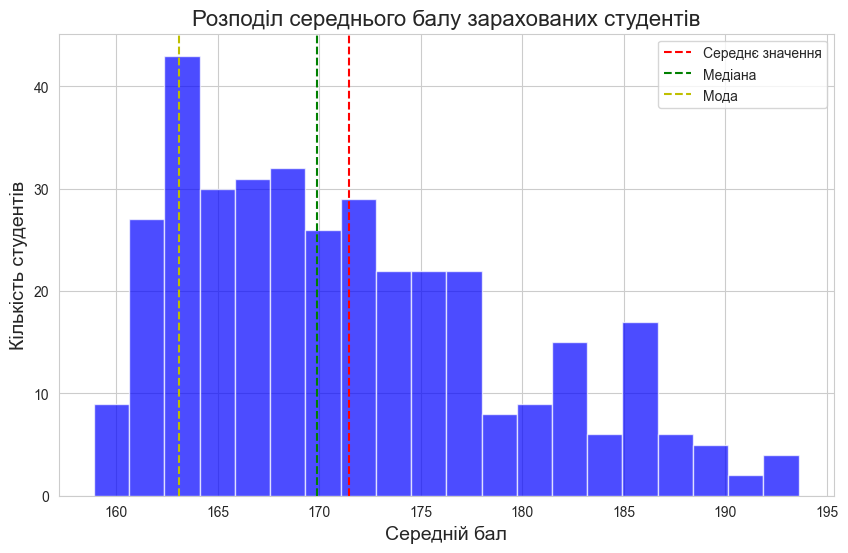

In [36]:
import matplotlib.pyplot as plt

passed_students = result_df[result_df['Рішення'] == 'Зараховано']

mean_score = passed_students['Рейтинг'].mean()
median_score = passed_students['Рейтинг'].median()
mode_score = passed_students['Рейтинг'].mode()[0]  

plt.figure(figsize=(10, 6))
plt.hist(passed_students['Рейтинг'], bins=20, color='blue', alpha=0.7)

plt.axvline(mean_score, color='r', linestyle='--', label='Середнє значення')
plt.axvline(median_score, color='g', linestyle='--', label='Медіана')
plt.axvline(mode_score, color='y', linestyle='--', label='Мода')

plt.title('Розподіл середнього балу зарахованих студентів', fontsize=16)
plt.xlabel('Середній бал', fontsize=14)
plt.ylabel('Кількість студентів', fontsize=14)
plt.legend()
plt.show()